# Annalyse datasets



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import linregress


# Évolution du nombre total de diabétiques de type 2 en France


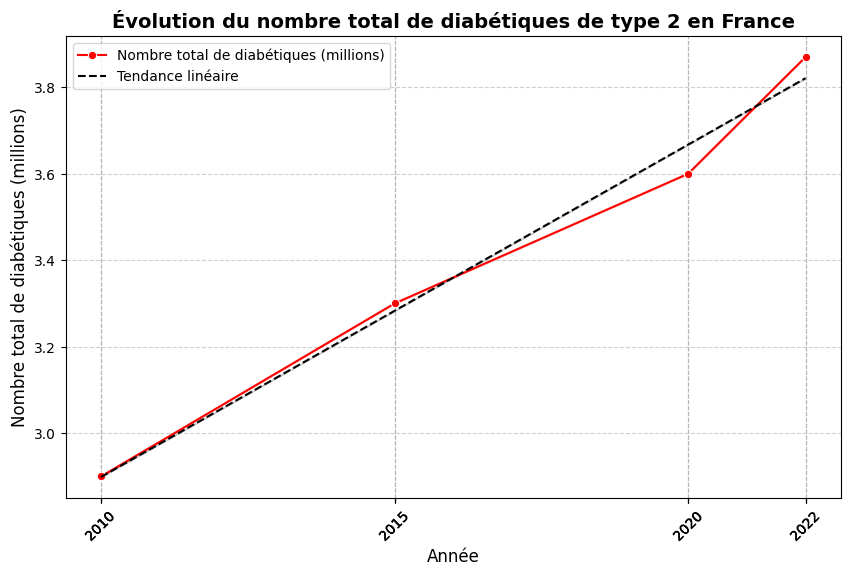

In [ ]:
file_path = "/content/type 2 diabete en france.xlsx"
df_diabetes = pd.read_excel(file_path, sheet_name="Sheet1")

# Sélectionner les colonnes pertinentes
df_diabetes = df_diabetes[['Année', 'Nombre total de diabétiques type 2 (millions)']]
df_diabetes = df_diabetes.dropna()

# Conversion des données
df_diabetes['Année'] = pd.to_numeric(df_diabetes['Année'])
df_diabetes['Nombre total de diabétiques type 2 (millions)'] = pd.to_numeric(df_diabetes['Nombre total de diabétiques type 2 (millions)'])

# Calcul de la tendance linéaire
slope, intercept, r_value, p_value, std_err = linregress(df_diabetes['Année'], df_diabetes['Nombre total de diabétiques type 2 (millions)'])
df_diabetes['Tendance'] = df_diabetes['Année'] * slope + intercept

# Création du graphique
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_diabetes, x="Année", y="Nombre total de diabétiques type 2 (millions)", marker="o", label="Nombre total de diabétiques (millions)", color="red")
sns.lineplot(data=df_diabetes, x="Année", y="Tendance", linestyle="dashed", label="Tendance linéaire", color="black")

# Ajout des titres et labels
plt.title("Évolution du nombre total de diabétiques de type 2 en France", fontsize=14, fontweight="bold")
plt.xlabel("Année", fontsize=12)
plt.ylabel("Nombre total de diabétiques (millions)", fontsize=12)
plt.xticks(df_diabetes["Année"], rotation=45)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

plt.show()


# Tendance Générale - Évolution des décès en France


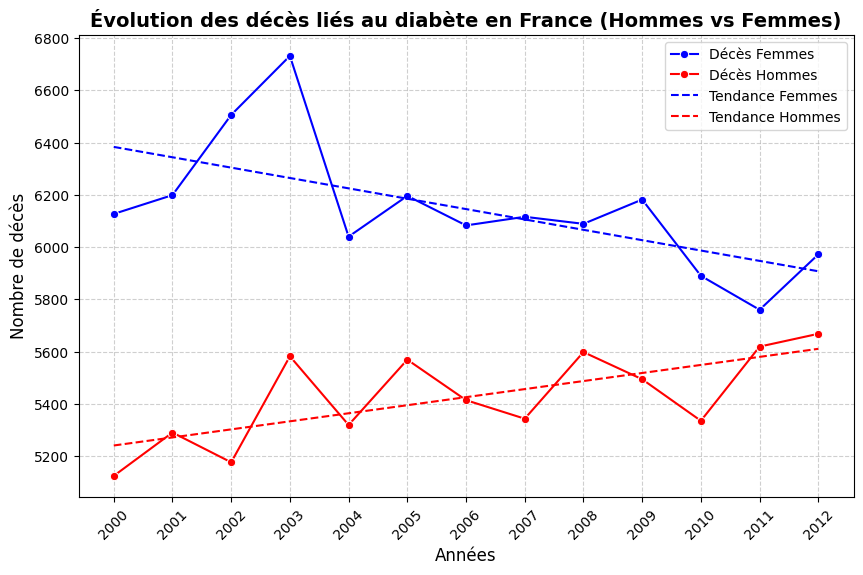

In [ ]:
file_path = "/content/MortFranceDiabete.xlsx"
df_mort = pd.read_excel(file_path, sheet_name="Sheet1")

# Sélectionner et renommer les colonnes
df_mort = df_mort[['Unnamed: 0', '001 France entiere', '001 France entiere.1']]
df_mort.columns = ['Années', 'Femmes', 'Hommes']

# Supprimer la première ligne descriptive (qui contient des labels et non des données)
df_mort = df_mort.drop(0).reset_index(drop=True)

# Convertir les colonnes en format numérique**
df_mort['Années'] = pd.to_numeric(df_mort['Années'], errors='coerce')
df_mort['Femmes'] = pd.to_numeric(df_mort['Femmes'], errors='coerce')
df_mort['Hommes'] = pd.to_numeric(df_mort['Hommes'], errors='coerce')

#Calcul de la tendance linéaire pour Hommes et Femmes
slope_f, intercept_f, _, _, _ = linregress(df_mort['Années'], df_mort['Femmes'])
slope_h, intercept_h, _, _, _ = linregress(df_mort['Années'], df_mort['Hommes'])

df_mort['Tendance Femmes'] = df_mort['Années'] * slope_f + intercept_f
df_mort['Tendance Hommes'] = df_mort['Années'] * slope_h + intercept_h

# Création du graphique
plt.figure(figsize=(10, 6))

# Tracer les courbes des décès pour hommes et femmes
sns.lineplot(data=df_mort, x="Années", y="Femmes", marker="o", label="Décès Femmes", color="blue")
sns.lineplot(data=df_mort, x="Années", y="Hommes", marker="o", label="Décès Hommes", color="red")

#  Ajouter les tendances linéaires
sns.lineplot(data=df_mort, x="Années", y="Tendance Femmes", linestyle="dashed", label="Tendance Femmes", color="blue")
sns.lineplot(data=df_mort, x="Années", y="Tendance Hommes", linestyle="dashed", label="Tendance Hommes", color="red")

plt.title("Évolution des décès liés au diabète en France (Hommes vs Femmes)", fontsize=14, fontweight="bold")
plt.xlabel("Années", fontsize=12)
plt.ylabel("Nombre de décès", fontsize=12)
plt.xticks(df_mort["Années"], rotation=45)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

plt.show()

<ipython-input-4-f5ab3acc1563>:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Décès", y="Région", data=df_regions_sorted, palette="Reds_r")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


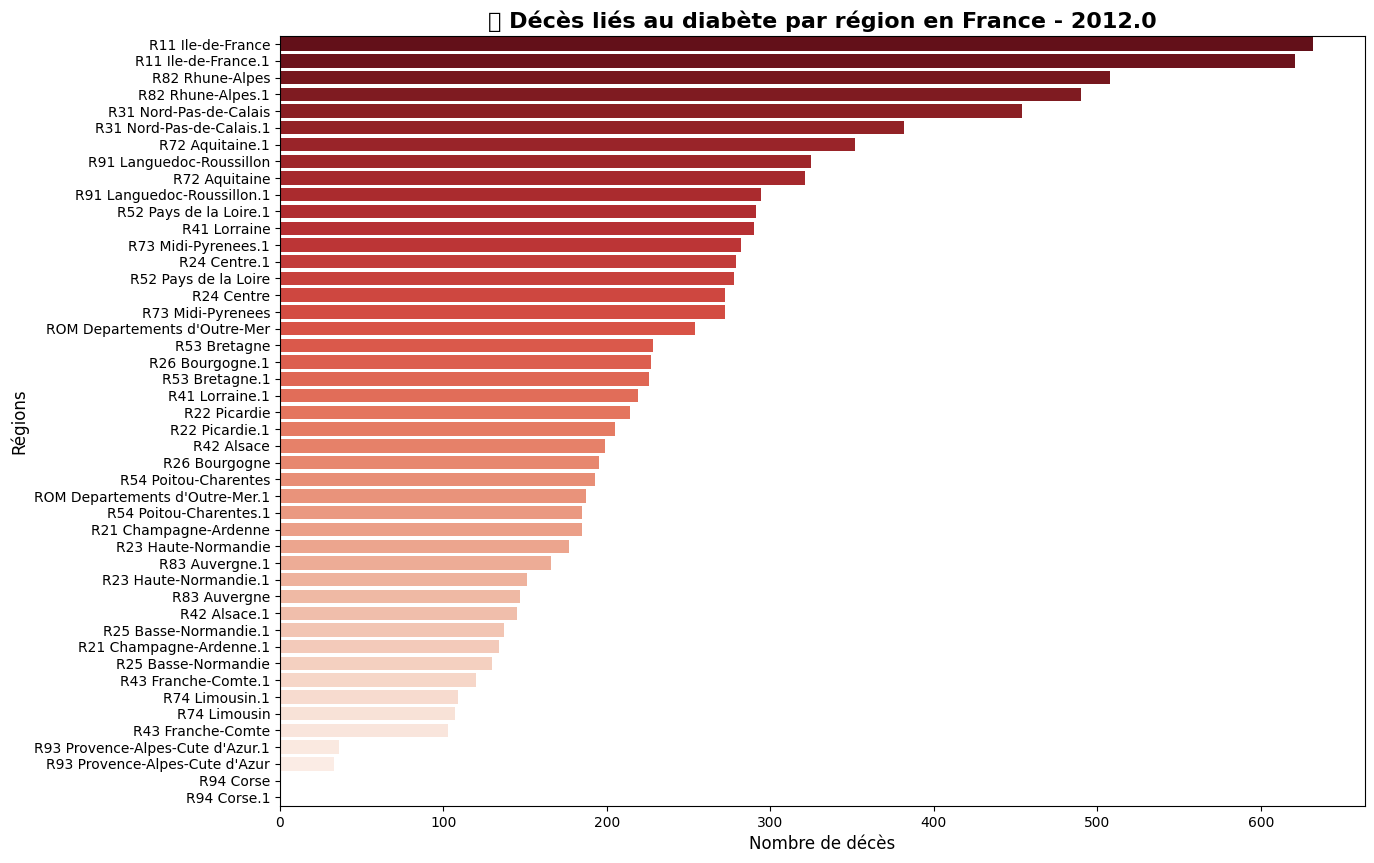

In [ ]:

file_path = "/content/MortFranceDiabete.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet1")

df.rename(columns={'Unnamed: 0': 'Années'}, inplace=True)

#Convertir la colonne "Années" en numérique
df['Années'] = pd.to_numeric(df['Années'], errors='coerce')

#Sélectionner les colonnes des régions (celles commençant par "R")
regions_columns = [col for col in df.columns if col.startswith("R")]
df_regions = df[['Années'] + regions_columns]

# Prendre la dernière année disponible
latest_year = df_regions['Années'].max()
df_latest = df_regions[df_regions['Années'] == latest_year].drop(columns=['Années']).T
df_latest.columns = ['Décès']
df_latest = df_latest.reset_index().rename(columns={'index': 'Région'})

# 6. Trier les régions par nombre de décès (du plus élevé au plus faible)
df_regions_sorted = df_latest.sort_values(by="Décès", ascending=False)

# Tracer le barplot des régions avec le plus de décès
plt.figure(figsize=(14, 10))
sns.barplot(x="Décès", y="Région", data=df_regions_sorted, palette="Reds_r")

# Ajouter des labels et un titre
plt.xlabel("Nombre de décès", fontsize=12)
plt.ylabel("Régions", fontsize=12)
plt.title(f"📊 Décès liés au diabète par région en France - {latest_year}", fontsize=16, fontweight="bold")

plt.show()

#Pourcentage des décès liés au diabète par région en 2000 (Hommes vs Femmes)

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


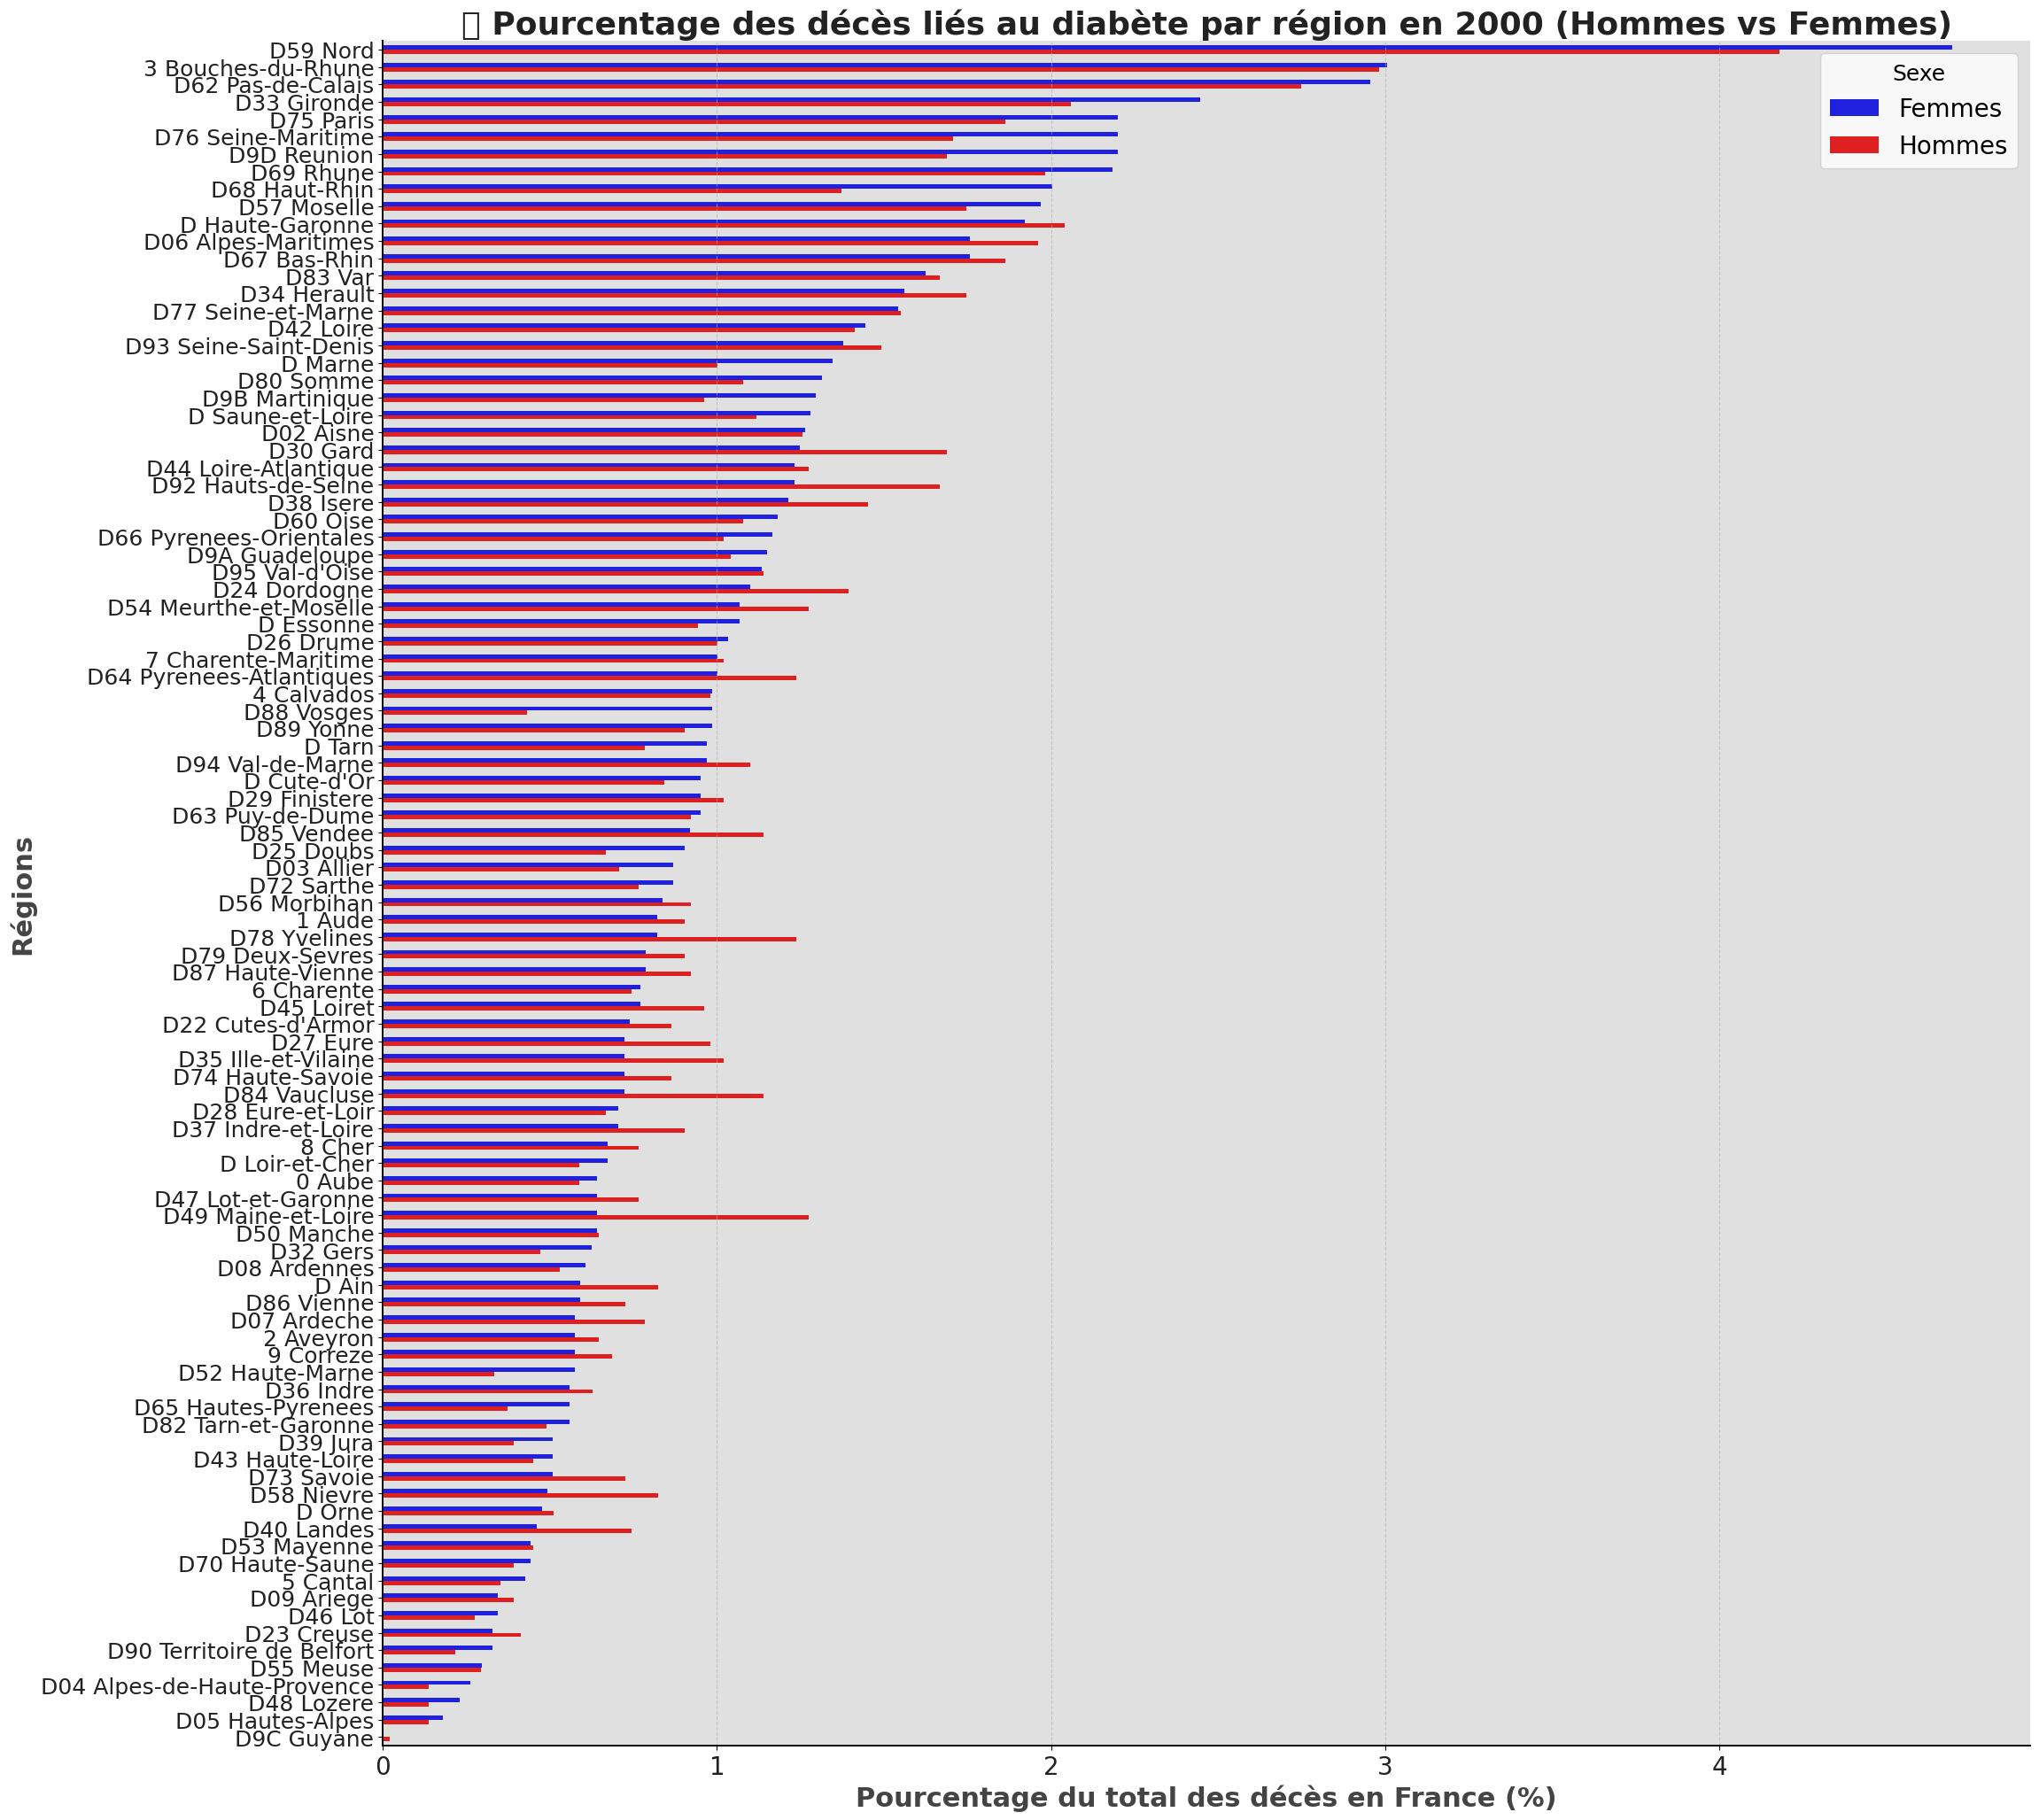

In [ ]:

file_path = "/content/MortFranceDiabete.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet1")


df.rename(columns={'Unnamed: 0': 'Années'}, inplace=True)

# Convertir la colonne "Années" en numérique
df['Années'] = pd.to_numeric(df['Années'], errors='coerce')

# Sélectionner les colonnes correspondant aux régions et à la France entière
regions_columns = [col for col in df.columns if col.startswith("D")]  # Départements
df_regions = df[['Années', '001 France entiere', '001 France entiere.1'] + regions_columns]

# Filtrer pour une année spécifique
latest_year = 2000
df_latest = df_regions[df_regions['Années'] == latest_year].drop(columns=['Années']).T
df_latest.columns = ['Décès']
df_latest = df_latest.reset_index().rename(columns={'index': 'Région'})

# Supprimer la ligne "France entière"
df_latest = df_latest[~df_latest['Région'].str.contains("France entiere", case=False, na=False)]

# Séparer les données hommes et femmes
df_latest['Sexe'] = df_latest['Région'].apply(lambda x: 'Hommes' if '.1' in x else 'Femmes')
df_latest['Région'] = df_latest['Région'].str.replace('.1', '', regex=True)

# Calculer les décès totaux en France pour normalisation
total_femmes = df_latest[df_latest['Sexe'] == 'Femmes']['Décès'].sum()
total_hommes = df_latest[df_latest['Sexe'] == 'Hommes']['Décès'].sum()

# Ajouter les pourcentages
df_latest['Pourcentage'] = df_latest.apply(lambda row: (row['Décès'] / total_femmes * 100) if row['Sexe'] == 'Femmes' else (row['Décès'] / total_hommes * 100), axis=1)

# Trier les régions pour un affichage plus clair
df_latest = df_latest.sort_values(by=['Sexe', 'Pourcentage'], ascending=[True, False])


plt.figure(figsize=(24, 25))

sns.barplot(x='Pourcentage', y='Région', hue='Sexe', data=df_latest, palette=['blue', 'red'], dodge=True, width=0.5)

# Amélioration visuelle et clarté
plt.title(f"Pourcentage des décès liés au diabète par région en {latest_year} (Hommes vs Femmes)",
          fontsize=26, fontweight="bold", color="#222222")
plt.xlabel("Pourcentage du total des décès en France (%)", fontsize=22, fontweight="bold", color="#444444")
plt.ylabel("Régions", fontsize=22, fontweight="bold", color="#444444")
plt.grid(axis='x', linestyle='--', alpha=0.6, linewidth=0.8)

plt.xticks(fontsize=20, color="#222222")
plt.yticks(fontsize=18, color="#222222")

plt.gca().set_facecolor("#e0e0e0")

plt.yticks(rotation=0)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(1.4)
plt.gca().spines['bottom'].set_linewidth(1.4)

plt.legend(title="Sexe", fontsize=20, title_fontsize=18, loc="upper right")
plt.show()


# Pourcentage des décès liés au diabète par région en 2012 (Hommes vs Femmes)

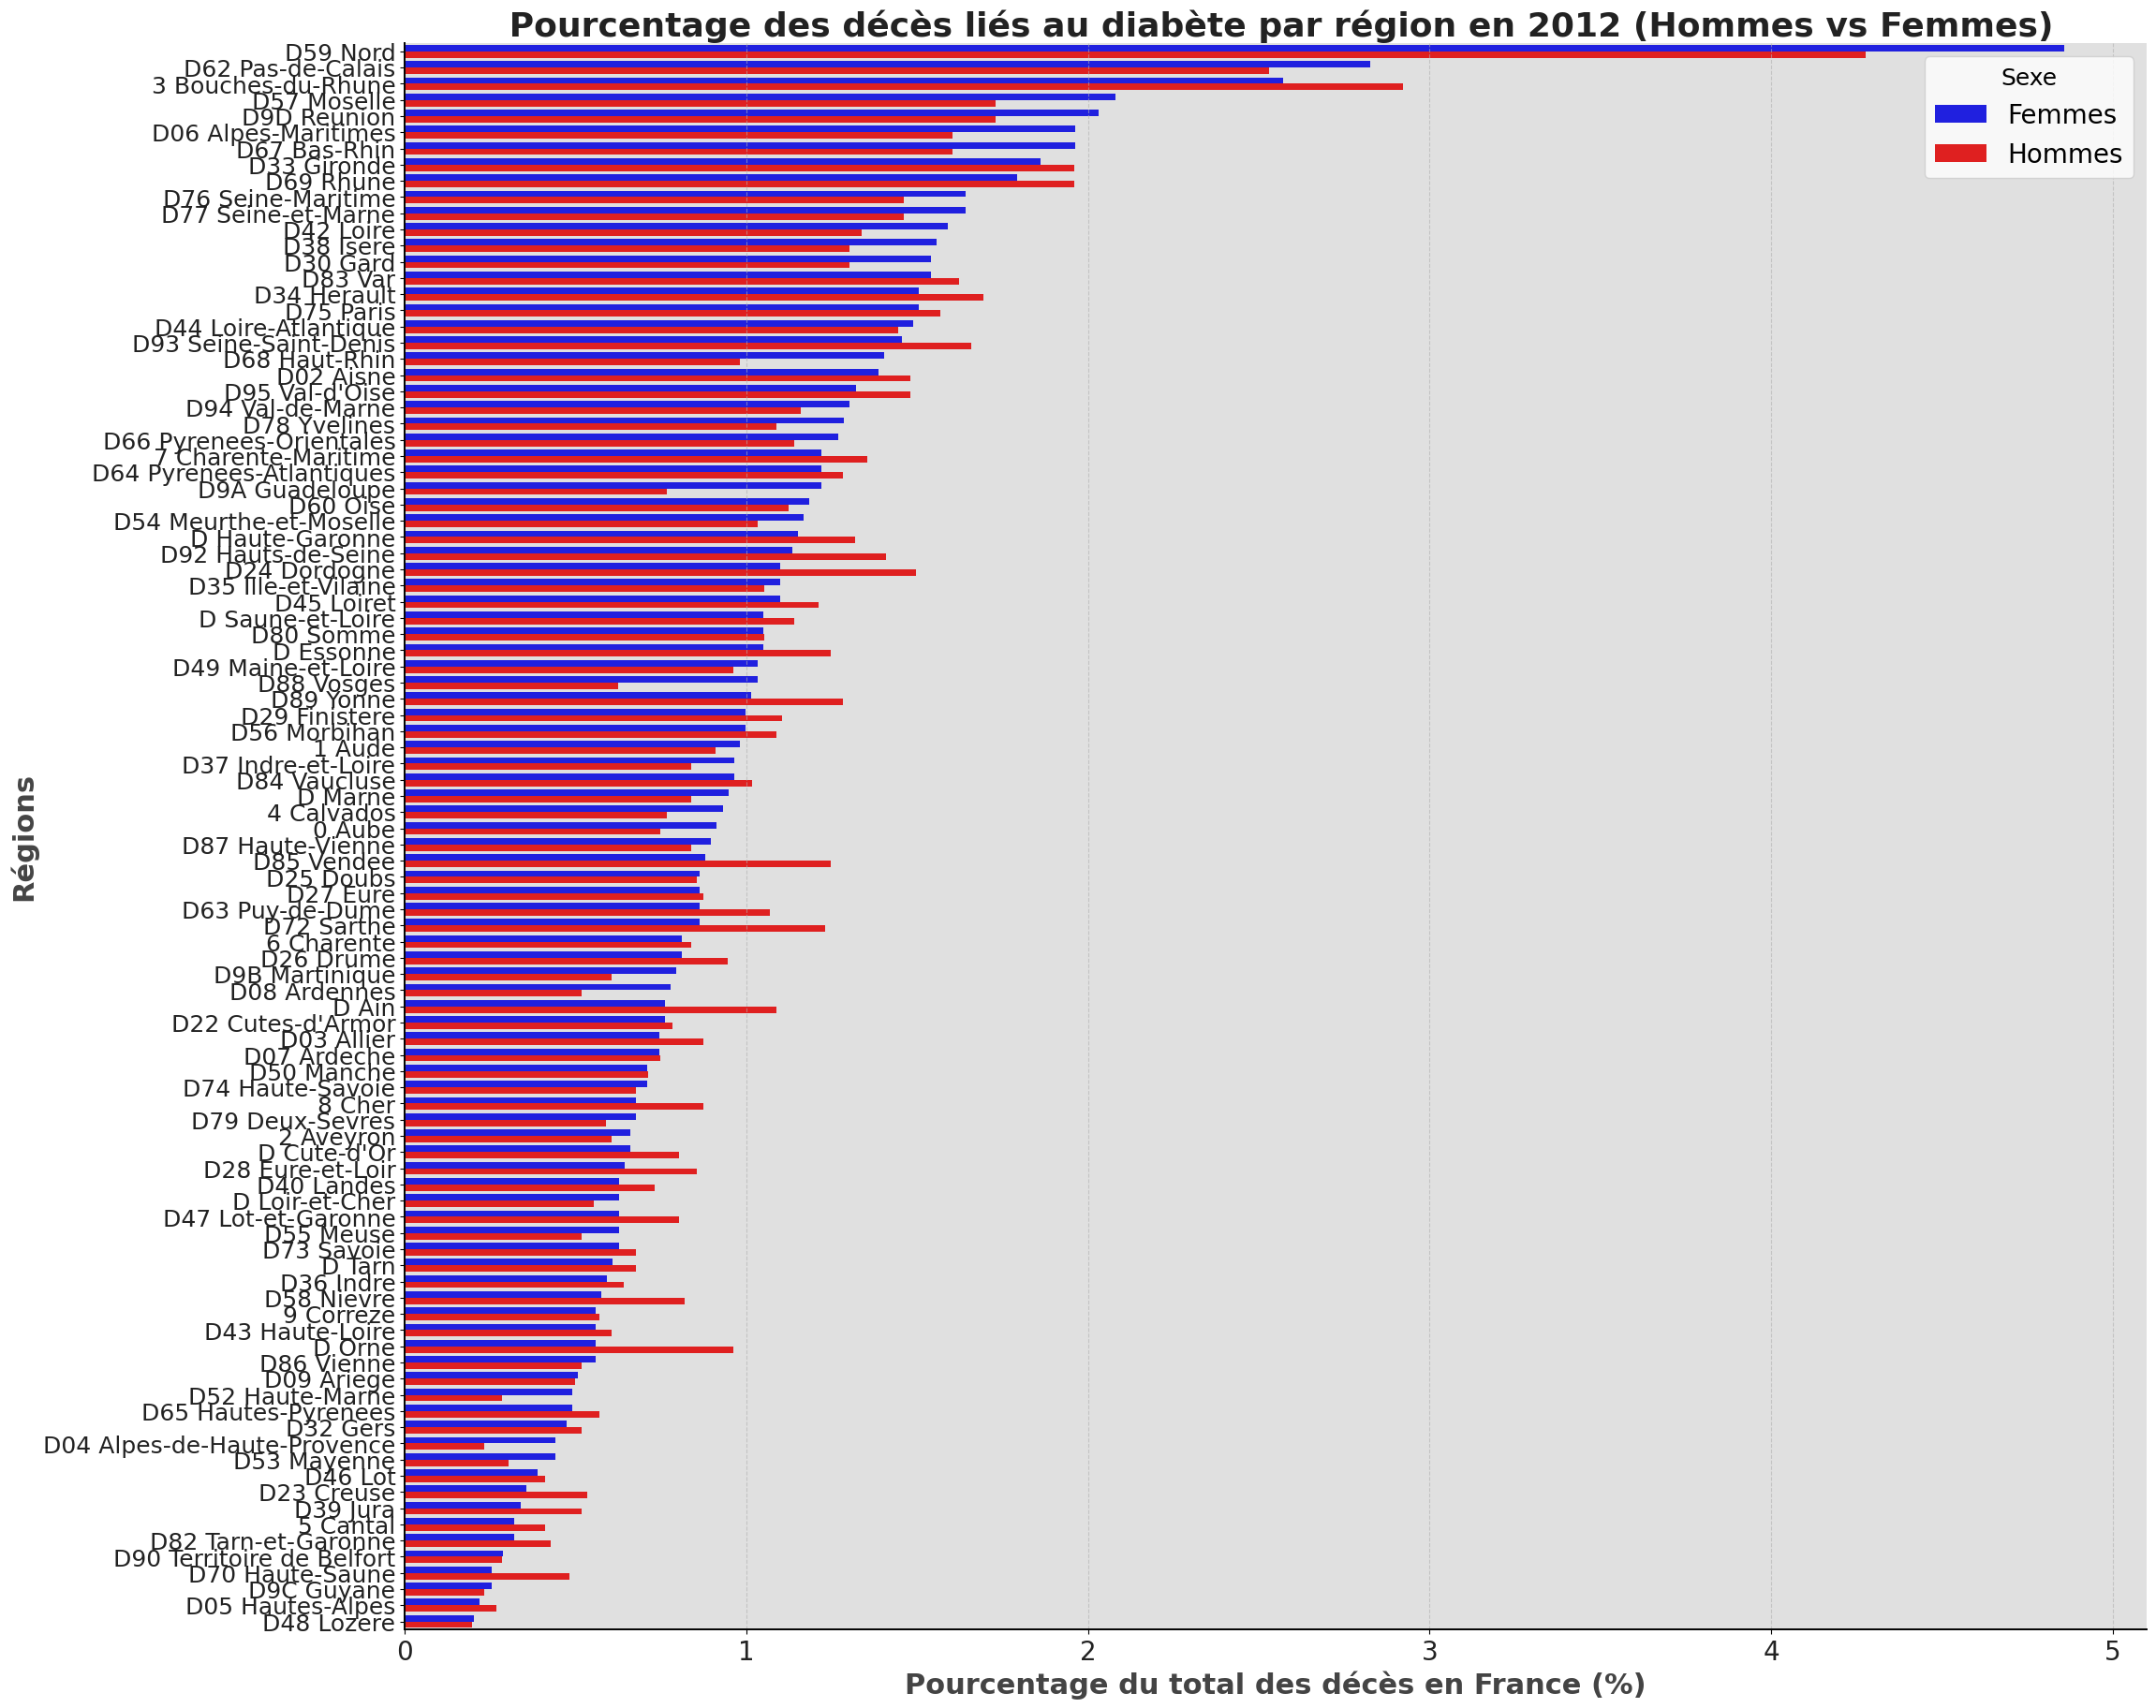

In [ ]:
file_path = "MortFranceDiabete.xlsx"
df = pd.read_excel(file_path, sheet_name="Sheet1")

# Renommer la colonne des années
df.rename(columns={'Unnamed: 0': 'Années'}, inplace=True)

# Convertir la colonne "Années" en numérique
df['Années'] = pd.to_numeric(df['Années'], errors='coerce')

# Sélectionner les colonnes correspondant aux régions et à la France entière
regions_columns = [col for col in df.columns if col.startswith("D")]  # Départements
df_regions = df[['Années', '001 France entiere', '001 France entiere.1'] + regions_columns]

# Filtrer pour une année spécifique
latest_year = 2012
df_latest = df_regions[df_regions['Années'] == latest_year].drop(columns=['Années']).T
df_latest.columns = ['Décès']
df_latest = df_latest.reset_index().rename(columns={'index': 'Région'})

# Supprimer la ligne "France entière"
df_latest = df_latest[~df_latest['Région'].str.contains("France entiere", case=False, na=False)]

# Séparer les données hommes et femmes
df_latest['Sexe'] = df_latest['Région'].apply(lambda x: 'Hommes' if '.1' in x else 'Femmes')
df_latest['Région'] = df_latest['Région'].str.replace('.1', '', regex=True)

# Calculer les décès totaux en France pour normalisation
total_femmes = df_latest[df_latest['Sexe'] == 'Femmes']['Décès'].sum()
total_hommes = df_latest[df_latest['Sexe'] == 'Hommes']['Décès'].sum()

# Ajouter les pourcentages
df_latest['Pourcentage'] = df_latest.apply(lambda row: (row['Décès'] / total_femmes * 100) if row['Sexe'] == 'Femmes' else (row['Décès'] / total_hommes * 100), axis=1)

df_latest = df_latest.sort_values(by=['Sexe', 'Pourcentage'], ascending=[True, False])

# Ajustement de la taille et de l'espacement des barres
plt.figure(figsize=(24, 22))

# Création du barplot avec un meilleur espacement des barres
sns.barplot(x='Pourcentage', y='Région', hue='Sexe', data=df_latest, palette=['blue', 'red'], dodge=True)

# Amélioration visuelle et clarté
plt.title(f" Pourcentage des décès liés au diabète par région en {latest_year} (Hommes vs Femmes)",
          fontsize=26, fontweight="bold", color="#222222")
plt.xlabel("Pourcentage du total des décès en France (%)", fontsize=22, fontweight="bold", color="#444444")
plt.ylabel("Régions", fontsize=22, fontweight="bold", color="#444444")
plt.grid(axis='x', linestyle='--', alpha=0.6, linewidth=0.8)  # Lignes de référence plus visibles

plt.xticks(fontsize=20, color="#222222")
plt.yticks(fontsize=18, color="#222222")


plt.gca().set_facecolor("#e0e0e0")

# Optimisation des labels des régions
plt.yticks(rotation=0)

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_linewidth(1.4)
plt.gca().spines['bottom'].set_linewidth(1.4)

plt.legend(title="Sexe", fontsize=20, title_fontsize=18, loc="upper right")
plt.show()


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


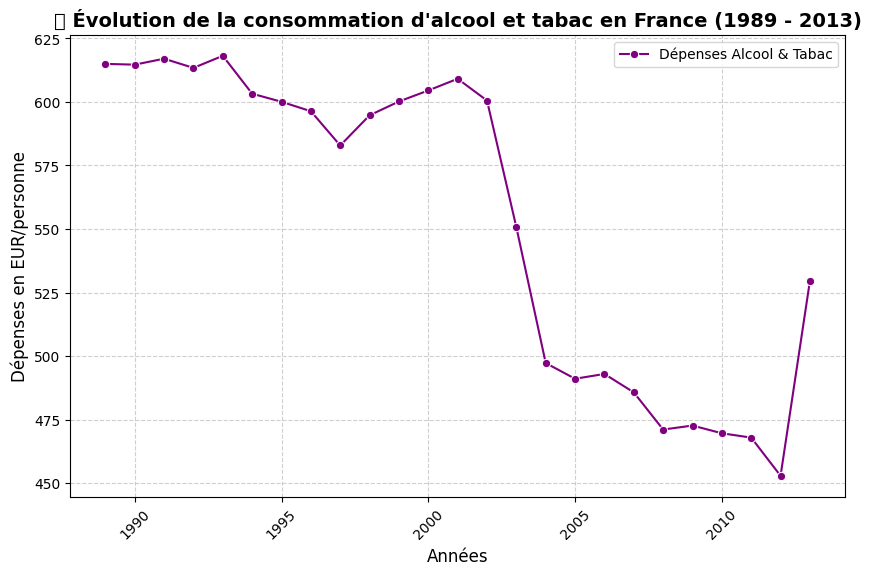

In [ ]:

file_path = "/content/CONSO ALCOOL TABAC F.xls"
df_alcool_tabac = pd.read_excel(file_path, sheet_name=0, skiprows=0)  # Ne pas ignorer la première ligne

#Transposer les données pour les rendre exploitables
df_alcool_tabac = df_alcool_tabac.set_index('Unnamed: 0').T  # Transposer le tableau
df_alcool_tabac = df_alcool_tabac.reset_index()  # Remettre les années en colonne
df_alcool_tabac.columns = ['Années', 'Dépenses Alcool & Tabac (EUR/personne)']

# Convertir les colonnes en format numérique
df_alcool_tabac['Années'] = pd.to_numeric(df_alcool_tabac['Années'], errors='coerce')
df_alcool_tabac['Dépenses Alcool & Tabac (EUR/personne)'] = pd.to_numeric(df_alcool_tabac['Dépenses Alcool & Tabac (EUR/personne)'], errors='coerce')

#Tracer l’évolution des dépenses en alcool et tabac en France
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_alcool_tabac, x="Années", y="Dépenses Alcool & Tabac (EUR/personne)", marker="o", color="purple", label="Dépenses Alcool & Tabac")

# Ajouter des labels et titres
plt.title("📉 Évolution de la consommation d'alcool et tabac en France (1989 - 2013)", fontsize=14, fontweight="bold")
plt.xlabel("Années", fontsize=12)
plt.ylabel("Dépenses en EUR/personne", fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.6)

plt.show()


# Nettoyage et preparation des données


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


Bon code


In [23]:
import pandas as pd

# Fonction de nettoyage spécifique aux bases temporelles
def load_and_clean_temporal_data(file_name):
    df = pd.read_excel(file_name, sheet_name="Graphiques", skiprows=3)  # Ignorer les 3 premières lignes inutiles
    df = df.rename(columns={df.columns[0]: "Année", df.columns[1]: "Valeur"})  # Renommer les colonnes correctement
    df = df.dropna().reset_index(drop=True)  # Supprimer les lignes vides et réindexer
    df["Année"] = pd.to_numeric(df["Année"], errors='coerce')  # Convertir les années en numérique
    df["Valeur"] = pd.to_numeric(df["Valeur"].astype(str).str.replace(',', '.'), errors='coerce')  # Convertir valeurs en float
    return df

# Charger et nettoyer chaque base temporelle
df_hba1c = load_and_clean_temporal_data("Au moins 3 dosages d'HbA1.xlsx")
df_creatininemie = load_and_clean_temporal_data("Au moins une créatininémie.xlsx")
df_microalbuminurie = load_and_clean_temporal_data("Au moins une microalbuminurie.xlsx")
df_lipides = load_and_clean_temporal_data("au moins un dosage des lipides.xlsx")
df_dentaire = load_and_clean_temporal_data("une consultation dentaire en libéral.xlsx")
df_cardio = load_and_clean_temporal_data("Un suivi cardiologique.xlsx")
df_ophtalmo = load_and_clean_temporal_data("un suivi ophtalmologique.xlsx")

# Vérification après nettoyage
print(df_hba1c.head())
print(df_creatininemie.head())
print(df_microalbuminurie.head())
print(df_lipides.head())
print(df_dentaire.head())
print(df_cardio.head())
print(df_ophtalmo.head())


    Année  Valeur
0  2010.0    41.8
1  2013.0    50.6
2  2016.0    54.0
3  2019.0    55.9
4  2020.0    52.5
    Année  Valeur
0  2010.0    80.6
1  2013.0    84.4
2  2016.0    85.7
3  2019.0    89.2
4  2020.0    88.5
    Année  Valeur
0  2010.0    26.6
1  2013.0    29.9
2  2016.0    31.4
3  2019.0    42.0
4  2020.0    40.9
    Année  Valeur
0  2010.0    71.9
1  2013.0    74.3
2  2016.0    74.5
3  2019.0    76.9
4  2020.0    76.3
    Année  Valeur
0  2010.0    34.4
1  2013.0    36.2
2  2016.0    37.2
3  2019.0    38.3
4  2020.0    34.1
    Année  Valeur
0  2010.0    34.2
1  2013.0    35.1
2  2016.0    36.2
3  2019.0    37.5
4  2020.0    36.2
    Année  Valeur
0  2010.0    60.9
1  2013.0    62.3
2  2016.0    62.3
3  2019.0    64.1
4  2020.0    62.6


In [24]:
import pandas as pd

# nettoyage
def clean_temporal_data(df):
    " Nettoie un dataframe contenant des données temporelles en supprimant les lignes inutiles."
    # Suppression des lignes vides
    df = df.dropna(how="all")

    # Suppression des en-têtes non nécessaires ("les 10 premiers", "les 10 derniers", "Territoires")
    df = df[~df.iloc[:, 0].astype(str).str.contains("les 10 premiers|les 10 derniers|Territoires", case=False, na=False)]

    # Renommer les colonnes correctement
    df.columns = ["Année", "Valeur"]

    # S'assurer que l'année est bien un entier et non du texte
    df["Année"] = pd.to_numeric(df["Année"], errors="coerce")

    # Convertir la colonne valeur en numérique
    df["Valeur"] = pd.to_numeric(df["Valeur"], errors="coerce")

    # Supprimer les lignes qui n'ont pas d'année valide
    df = df.dropna().reset_index(drop=True)

    return df

#  Appliquer le nettoyage
df_hba1c = clean_temporal_data(df_hba1c)
df_creatininemie = clean_temporal_data(df_creatininemie)
df_microalbuminurie = clean_temporal_data(df_microalbuminurie)
df_lipides = clean_temporal_data(df_lipides)
df_dentaire = clean_temporal_data(df_dentaire)
df_cardio = clean_temporal_data(df_cardio)
df_ophtalmo = clean_temporal_data(df_ophtalmo)

# Vérification après nettoyage
print(df_hba1c.head())
print(df_creatininemie.head())
print(df_microalbuminurie.head())
print(df_lipides.head())
print(df_dentaire.head())
print(df_cardio.head())
print(df_ophtalmo.head())


    Année  Valeur
0  2010.0    41.8
1  2013.0    50.6
2  2016.0    54.0
3  2019.0    55.9
4  2020.0    52.5
    Année  Valeur
0  2010.0    80.6
1  2013.0    84.4
2  2016.0    85.7
3  2019.0    89.2
4  2020.0    88.5
    Année  Valeur
0  2010.0    26.6
1  2013.0    29.9
2  2016.0    31.4
3  2019.0    42.0
4  2020.0    40.9
    Année  Valeur
0  2010.0    71.9
1  2013.0    74.3
2  2016.0    74.5
3  2019.0    76.9
4  2020.0    76.3
    Année  Valeur
0  2010.0    34.4
1  2013.0    36.2
2  2016.0    37.2
3  2019.0    38.3
4  2020.0    34.1
    Année  Valeur
0  2010.0    34.2
1  2013.0    35.1
2  2016.0    36.2
3  2019.0    37.5
4  2020.0    36.2
    Année  Valeur
0  2010.0    60.9
1  2013.0    62.3
2  2016.0    62.3
3  2019.0    64.1
4  2020.0    62.6


In [27]:
# verification
print("🔍 Vérification des lignes vides dans chaque base temporelle :")
print("HbA1c : ", df_hba1c[df_hba1c["Année"].isna()])
print("Créatininémie : ", df_creatininemie[df_creatininemie["Année"].isna()])
print("Microalbuminurie : ", df_microalbuminurie[df_microalbuminurie["Année"].isna()])
print("Lipides : ", df_lipides[df_lipides["Année"].isna()])
print("Dentaire : ", df_dentaire[df_dentaire["Année"].isna()])
print("Cardio : ", df_cardio[df_cardio["Année"].isna()])
print("Ophtalmo : ", df_ophtalmo[df_ophtalmo["Année"].isna()])


🔍 Vérification des lignes vides dans chaque base temporelle :
HbA1c :  Empty DataFrame
Columns: [Année, Valeur]
Index: []
Créatininémie :  Empty DataFrame
Columns: [Année, Valeur]
Index: []
Microalbuminurie :  Empty DataFrame
Columns: [Année, Valeur]
Index: []
Lipides :  Empty DataFrame
Columns: [Année, Valeur]
Index: []
Dentaire :  Empty DataFrame
Columns: [Année, Valeur]
Index: []
Cardio :  Empty DataFrame
Columns: [Année, Valeur]
Index: []
Ophtalmo :  Empty DataFrame
Columns: [Année, Valeur]
Index: []


In [28]:
#verification
print("HbA1c shape :", df_hba1c.shape)
print("Créatininémie shape :", df_creatininemie.shape)
print("Microalbuminurie shape :", df_microalbuminurie.shape)
print("Lipides shape :", df_lipides.shape)
print("Dentaire shape :", df_dentaire.shape)
print("Cardio shape :", df_cardio.shape)
print("Ophtalmo shape :", df_ophtalmo.shape)


HbA1c shape : (8, 2)
Créatininémie shape : (8, 2)
Microalbuminurie shape : (8, 2)
Lipides shape : (8, 2)
Dentaire shape : (8, 2)
Cardio shape : (8, 2)
Ophtalmo shape : (8, 2)


In [31]:
# Vérifier colonne année
for df_name, df in [("HbA1c", df_hba1c), ("Créatininémie", df_creatininemie), ("Microalbuminurie", df_microalbuminurie),
                    ("Lipides", df_lipides), ("Dentaire", df_dentaire), ("Cardio", df_cardio), ("Ophtalmo", df_ophtalmo)]:
    if "Année" not in df.columns:
        print(f" Problème : '{df_name}' n'a pas de colonne 'Année' ! ")
    else:
        print(f"'{df_name}' contient bien la colonne 'Année'.")


'HbA1c' contient bien la colonne 'Année'.
'Créatininémie' contient bien la colonne 'Année'.
'Microalbuminurie' contient bien la colonne 'Année'.
'Lipides' contient bien la colonne 'Année'.
'Dentaire' contient bien la colonne 'Année'.
'Cardio' contient bien la colonne 'Année'.
'Ophtalmo' contient bien la colonne 'Année'.


In [32]:
# Fusionner les bases temporelles
df_temps = df_hba1c.copy()

# Fusionner sur  "Année"
df_temps = df_temps.merge(df_creatininemie, on="Année", how="outer", suffixes=("", "_Creatininemie"))
df_temps = df_temps.merge(df_microalbuminurie, on="Année", how="outer", suffixes=("", "_Microalbuminurie"))
df_temps = df_temps.merge(df_lipides, on="Année", how="outer", suffixes=("", "_Lipides"))
df_temps = df_temps.merge(df_dentaire, on="Année", how="outer", suffixes=("", "_Dentaire"))
df_temps = df_temps.merge(df_cardio, on="Année", how="outer", suffixes=("", "_Cardio"))
df_temps = df_temps.merge(df_ophtalmo, on="Année", how="outer", suffixes=("", "_Ophtalmo"))

print(df_temps.head())

# verification
print(f"Fusion terminée ! Dimensions du DataFrame fusionné : {df_temps.shape}")


    Année  Valeur  Valeur_Creatininemie  Valeur_Microalbuminurie  \
0  2010.0    41.8                  80.6                     26.6   
1  2013.0    50.6                  84.4                     29.9   
2  2016.0    54.0                  85.7                     31.4   
3  2019.0    55.9                  89.2                     42.0   
4  2020.0    52.5                  88.5                     40.9   

   Valeur_Lipides  Valeur_Dentaire  Valeur_Cardio  Valeur_Ophtalmo  
0            71.9             34.4           34.2             60.9  
1            74.3             36.2           35.1             62.3  
2            74.5             37.2           36.2             62.3  
3            76.9             38.3           37.5             64.1  
4            76.3             34.1           36.2             62.6  
Fusion terminée ! Dimensions du DataFrame fusionné : (8, 8)


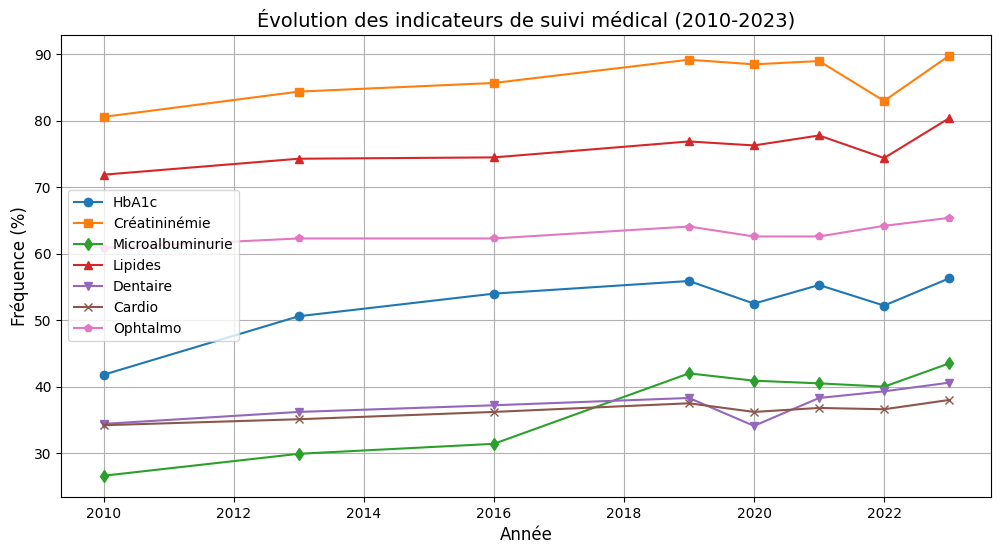

In [33]:
import matplotlib.pyplot as plt

# Tracer l'évolution des indicateurs de suivi médical
plt.figure(figsize=(12, 6))

# Tracer chaque série de données
plt.plot(df_temps["Année"], df_temps["Valeur"], marker="o", label="HbA1c")
plt.plot(df_temps["Année"], df_temps["Valeur_Creatininemie"], marker="s", label="Créatininémie")
plt.plot(df_temps["Année"], df_temps["Valeur_Microalbuminurie"], marker="d", label="Microalbuminurie")
plt.plot(df_temps["Année"], df_temps["Valeur_Lipides"], marker="^", label="Lipides")
plt.plot(df_temps["Année"], df_temps["Valeur_Dentaire"], marker="v", label="Dentaire")
plt.plot(df_temps["Année"], df_temps["Valeur_Cardio"], marker="x", label="Cardio")
plt.plot(df_temps["Année"], df_temps["Valeur_Ophtalmo"], marker="p", label="Ophtalmo")

# Personnalisation du graphique
plt.title("Évolution des indicateurs de suivi médical (2010-2023)", fontsize=14)
plt.xlabel("Année", fontsize=12)
plt.ylabel("Fréquence (%)", fontsize=12)
plt.legend(loc="best")
plt.grid(True)

plt.show()


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


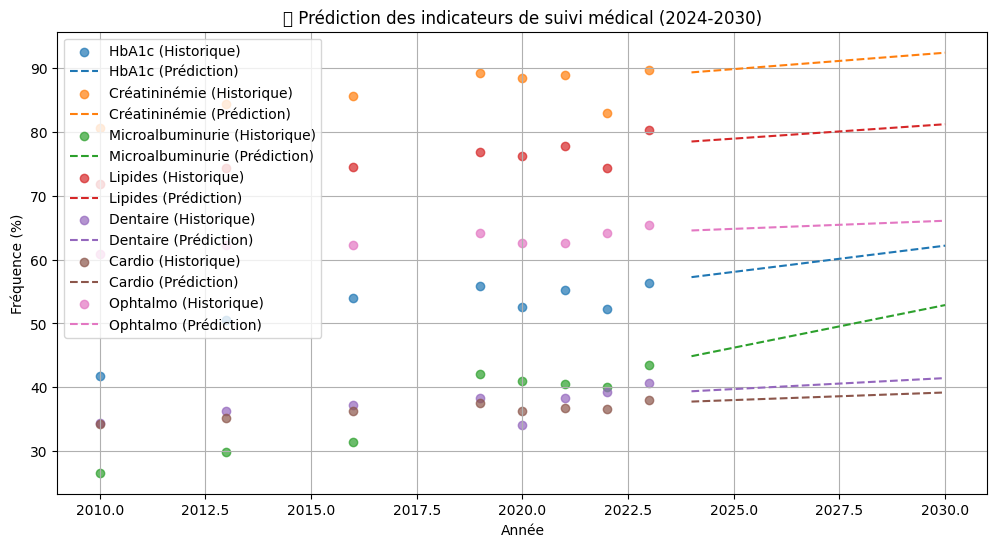

In [34]:
# Préparer les données
future_years = np.arange(2024, 2031).reshape(-1, 1)

def train_and_predict(df, label):
    X = df["Année"].values.reshape(-1, 1)
    y = df["Valeur"].values.reshape(-1, 1)

    # Entraîner le modèle de régression linéaire
    model = LinearRegression()
    model.fit(X, y)

    # Prédiction des années futures
    predictions = model.predict(future_years)

    return model, predictions

# Visualisation des prédictions
def plot_predictions(df, predictions, label):
    plt.scatter(df["Année"], df["Valeur"], label=f"{label} (Historique)", alpha=0.7)
    plt.plot(future_years, predictions, linestyle='dashed', label=f"{label} (Prédiction)")

# Appliquer la régression linéaire sur toutes les variables
dataframes = {
    "HbA1c": df_hba1c,
     "Créatininémie": df_creatininemie,
    "Microalbuminurie": df_microalbuminurie,
    "Lipides": df_lipides,
    "Dentaire": df_dentaire,
    "Cardio": df_cardio,
    "Ophtalmo": df_ophtalmo
}

plt.figure(figsize=(12, 6))
for label, df in dataframes.items():
    model, predictions = train_and_predict(df, label)
    plot_predictions(df, predictions, label)

plt.xlabel("Année")
plt.ylabel("Fréquence (%)")
plt.title("Prédiction des indicateurs de suivi médical (2024-2030)")
plt.legend()
plt.grid()
plt.show()
